In [1]:
%load_ext watermark
%watermark -d -u -a 'Anubhav Dhiman' -v -p numpy,scipy,matplotlib,sklearn

Anubhav Dhiman 
last updated: 2018-01-23 

CPython 3.5.4
IPython 6.1.0

numpy 1.13.1
scipy 0.19.1
matplotlib 2.1.0
sklearn 0.19.1


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
X.shape

(100, 2)

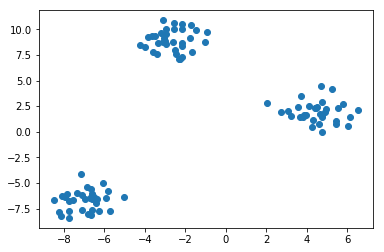

In [4]:
plt.scatter(X[:, 0], X[:, 1]);

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
labels

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 2, 2, 0, 1, 2], dtype=int32)

In [6]:
all(y == labels)

False

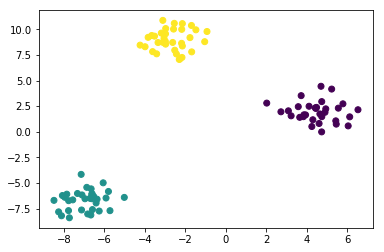

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=labels);

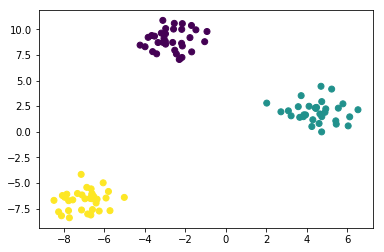

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y);

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score

print('accuracy score:', accuracy_score(y, labels))
print('confusion matrix:\n',confusion_matrix(y, labels))

accuracy score: 0.0
confusion matrix:
 [[ 0  0 34]
 [33  0  0]
 [ 0 33  0]]


In [11]:
np.mean(y==labels)

0.0

In [12]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y, labels)

1.0

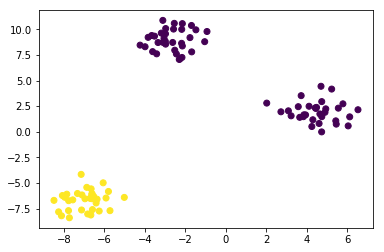

In [13]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels);

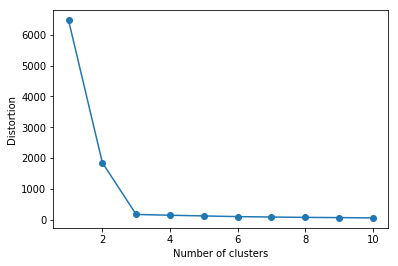

In [14]:
# the elbow method

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

plt.show()

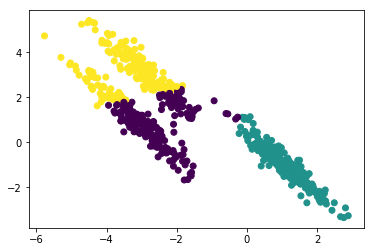

In [15]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

y_pred = KMeans(n_clusters=3).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)

(10, 64)


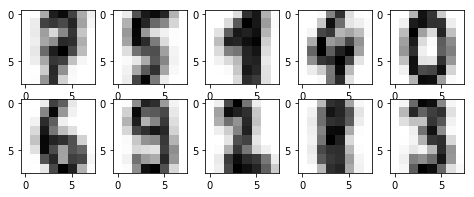

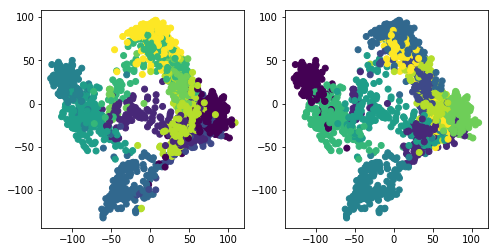

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(digits.data)

print(kmeans.cluster_centers_.shape)

#------------------------------------------------------------
# visualize the cluster centers
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i)
    ax.imshow(kmeans.cluster_centers_[i].reshape((8, 8)),
              cmap=plt.cm.binary)
from sklearn.manifold import Isomap
X_iso = Isomap(n_neighbors=10).fit_transform(digits.data)

#------------------------------------------------------------
# visualize the projected data
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=digits.target)
